# Solution of Ordinary Diffarential equation

In this notebook I am gonna to write all numerical methods for evaluting ODE.

# 1. Euler method for 1st Order ODE using Euler method

The Taylor series about $x = 0$ is given by
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+..$$

As we are going to evalute the solution in modern computer so we can make the $h$ very small. So we are gonna to take only two terms of the series.

$$f(x+h) = f(x) + hf'(x)$$

The recurssion relationship can be written as, THE EULER METHOD

$$f(x_n) = f(x_{n-1})+hf'(x_{n-1})$$

The 1st order diffarential equation can be in the form of 

$$\frac{dy}{dx}=f(x,y)$$



In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Make the graph beautiful
import seaborn as sns
sns.set()

In [2]:
#Graphical approch to understand the Solution

class firstOrderEuler:

    def __init__(self, xi, yi, f, xf, h):
        
        self.xi, self.yi, self.f, self.xf, self.h = xi, yi, f, xf, h

    def y_axis(self):
        x, y = self.xi, self.yi
        yy = []
        while (x < self.xf):
            yy.append(y)
            x += self.h
            y += self.h*self.f(x, y)  #Euler logic

        return yy

    def x_axis(self):
        x = self.xi
        xx = []
        while (x < self.xf):
            xx.append(x)
            x += self.h

        return xx

**Diffarential Eq 1:**

$$\frac{dy}{dx}=-y$$


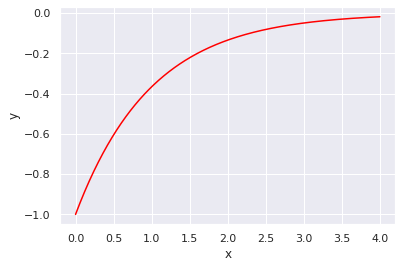

In [3]:
#The diffarential equation
def f(x, y):
    return -y

#Intial Condition
xi = 0
yi = -1

#Range
xf = 4
h = 0.01

#Object
D1 = firstOrderEuler(xi, yi, lambda x,y: -y, xf, h)

#Plotting
plt.rcParams["figure.figsize"] = (12, 4)
plt.plot(D1.x_axis(), D1.y_axis(), "red")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.show()

> **Falling under a resistive medium**

We can make a physical problem: A partical is falling under gravity in a resistive medium.
$$\vec F = m\vec g - k \vec v$$
So the difarential equation becomes :
$$\frac{dv}{dt} = g - v$$

To study the velocity we can make some intial condition initially the partical has zero velocity. 

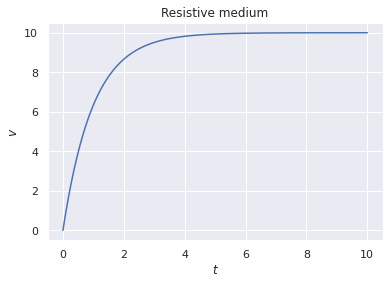

In [4]:
D = firstOrderEuler(0, 0, lambda x, y: 10 - y, 10, 0.01)

plt.title("Resistive medium")
plt.plot(D.x_axis(), D.y_axis())
plt.ylabel(r"$v$")
plt.xlabel(r'$t$')
plt.show()

Conclusion: We can see that the velocity becomes constant after around 5 sec. It is the terminal velocity.

****
**Diffarential Eq 2**
$$\frac{dy}{dx}=\sin(x)$$

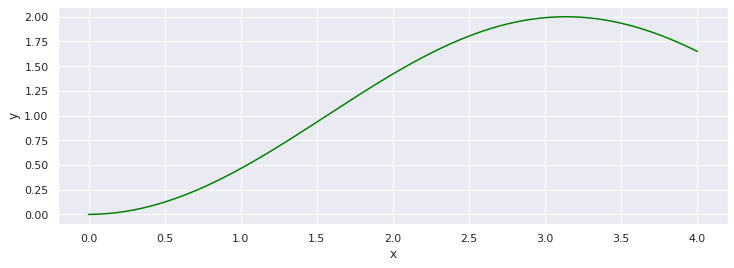

In [5]:
import math as m
#The diffarential equation
def g(x, y):
    return m.sin(x)

#Intial Condition
xi = 0
yi = 0

#Range
xf = 4
h = 0.01

#Object
D2 = firstOrderEuler(xi, yi, g, xf, h)

#Plotting
plt.rcParams["figure.figsize"] = (12, 4)
plt.plot(D2.x_axis(), D2.y_axis(), "Green")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.show()

# 2. Second order Ordinary Diffarential Equation using Euler method

In this case you will solve two 1st order DE simulataneously using Euler Method.
Say the DE is given by

$$y''(x)+p(x) y'(x)+q(x)y(x)=g(x,y)$$

Substituting $z = y'$, so the above equation becomes $z'=\frac{g(x,y)-q(x)y(x)}{p(x)z}$

So we have two ODE:

1. $z(y) = y'$
2. $z'(x,y,z)=\frac{g(x,y)-q(x)y(x)}{p(x)z}$

We have to simultaneously solve these equations.


In [6]:
class secondOrderEuler:
    def __init__(self, xi, yi, zi, g, xf, h):
        self.xi, self.yi, self.zi, self.g, self.xf, self.h = xi, yi, zi, g, xf, h

    def y_axis(self):
        x, y, z = self.xi, self.yi, self.zi
        yy = []
        while(x < self.xf):
            yy.append(y)
            y += self.h*z                  # THE
            x += self.h                    # SIMULTANEOUS
            z += self.h*self.g(x, y, z)    # EQUATIONS
                        
        return yy

    #         #          #
    def z_axis(self):
        x, y, z = self.xi, self.yi, self.zi
        zz = []
        while(x < self.xf):
            zz.append(z)
            z += self.h*self.g(x, y, z)
            x += self.h
            y += self.h*z
            
        return zz
    #         #          #

    def x_axis(self):
        x = self.xi
        xx = []
        while (x < self.xf):
            xx.append(x)
            x += self.h

        return xx

**Diffarential Eq 3:**

$y''-y = x$, $y(0)=0$, $y'(0)=1$   with $h = 0.1$ and $x_f = 5$

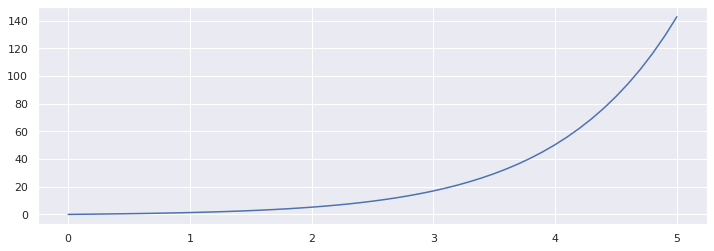

In [7]:
D3 = secondOrderEuler(0, 0, 1, lambda x, y, z: y + x, 5, 0.1)

#Plotting
plt.rcParams["figure.figsize"] = (12, 4)
plt.plot(D3.x_axis(), D3.y_axis())
plt.plot()
plt.show()

**Diffarential Eq 4:**

$y'' - 3y' + 2y = 0$, $y(0)=-1$, $y'(0)=0$

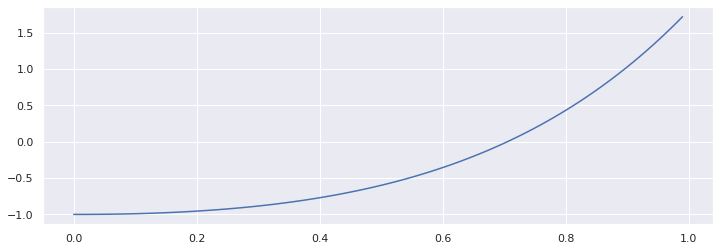

In [8]:
D4 = secondOrderEuler(0, -1, 0, lambda x, y, z : 3*z - 2*y, 1, 0.01)

plt.plot(D4.x_axis(), D4.y_axis())
plt.rcParams["figure.figsize"] = (12, 4)
plt.show()

**Diffarential Eq 5:**

$y''+y=0$, $y(0)=2$;$y'(0)=0$ Simple Harmonic DE

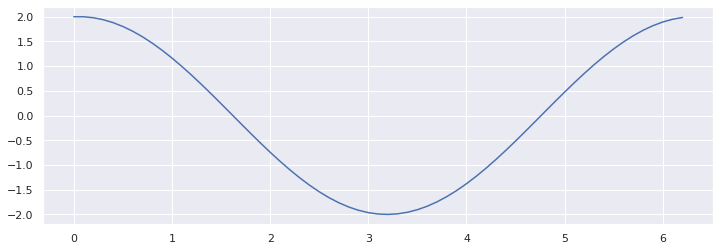

In [9]:
D5 = secondOrderEuler(0, 2, 0, lambda x, y, z: -y, 2*3.1415, 0.1)

plt.plot(D5.x_axis(), D5.y_axis())
plt.rcParams["figure.figsize"] = (12, 4)
plt.show()

# Real Physics Problems:

## 1. Damped Harmonic Oscillator
With restoring force and damping force the equation of motion is given by

$$m\frac{d^2x}{dt^2}=-kx-\beta \frac{dx}{dt}$$

If $\beta/m = 2 \gamma$ and $k/m=\omega^2$

$$\ddot{x}+2\gamma \dot x+\omega^2 x=0$$

I gonna to check 
* Over-damped motion: $\gamma^2 > \omega^2$
* Critically damped motion: $\gamma^2 = \omega^2$
* Under-damped: $\gamma^2 < \omega^2$

#### 1. For Overdamped : 
$$\ddot{x}+4 \dot x+ x=0$$


#### 2. For Critically damped : 
$$\ddot{x}+2 \dot x+ x=0$$


#### 3. For Under-damped :
$$\ddot x+\dot x+x=0$$
>Intial condition:
$x(0)=5$;
$x'(0)=0$


As I have set $y$ and $x$ in the program so here $x$ ->$y$ and $t$ -> $x$.

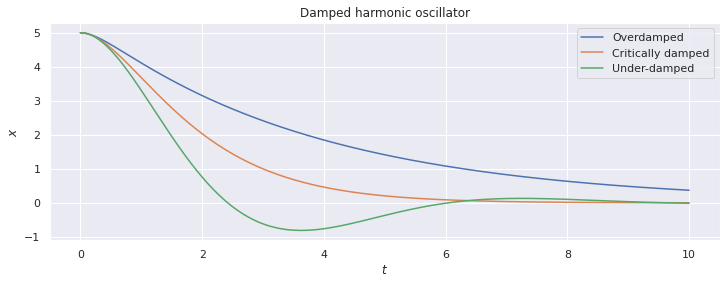

In [10]:
D6 = secondOrderEuler(0, 5, 0, lambda x, y, z: -(4*z + y), 10, 0.01)
D7 = secondOrderEuler(0, 5, 0, lambda x, y, z: -2*z - y, 10, 0.01)
D8 = secondOrderEuler(0, 5, 0, lambda x, y, z : -z - y, 10, 0.01)

plt.title("Damped harmonic oscillator")
plt.plot(D6.x_axis(), D6.y_axis(), label = "Overdamped")
plt.plot(D7.x_axis(), D7.y_axis(), label = "Critically damped")
plt.plot(D8.x_axis(), D8.y_axis(), label = "Under-damped")
plt.legend(loc = 'best')
plt.ylabel(r"$x$")
plt.xlabel(r'$t$')

plt.show()

## 2. Forced vibration

In this case in addition to restoring force and damping force we impress the mass $m$ a force $F(t)$ where $F(t) = F_0 e^{j \alpha t}$ i.e, the force is sinosoidally varying.

So, 
$$m \frac{d^2x}{dt^2}=-kx-\beta \frac{dx}{dt}+F_0 \sin(\alpha t)$$

$$\ddot x + 2\gamma \dot x+\omega^2 x = f_0 \sin(\alpha t)$$

If we solve this analytically we got:
$$x = \frac{f_0}{\sqrt{(\alpha ^2 - \omega ^2)^2+4\gamma^2 \alpha^2}}\sin (\alpha t - \phi)$$

where $\tan \phi = \frac {2\gamma \alpha}{\alpha^2 - \omega^2}$

> **Equation**: $\ddot x + 2\dot x+x =  \sin(t)$

Intial condition:
$x(0)=5$;
$x'(0)=0$


As I have set $y$ and $x$ in the program so here $x$ ->$y$ and $t$ -> $x$.

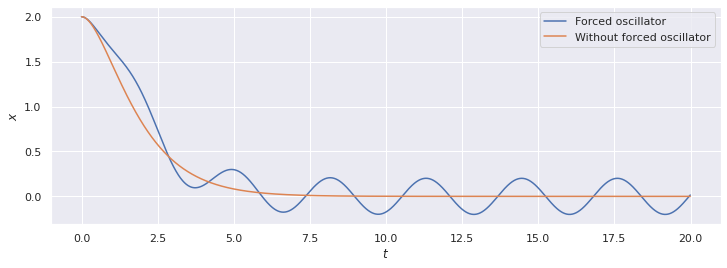

In [11]:
D9 = secondOrderEuler(0, 2, 0, lambda x, y, z: -2*z - y + np.sin(2*x) , 20, 0.01)
D10 = secondOrderEuler(0, 2, 0, lambda x, y, z: -(2*z + y), 20, 0.01)

#plt.title("Forced oscillator")
plt.plot(D9.x_axis(), D9.y_axis(), label = "Forced oscillator")
plt.plot(D10.x_axis(), D10.y_axis(), label = "Without forced oscillator")
plt.legend(loc = 'best')
plt.ylabel(r"$x$")
plt.xlabel(r'$t$')
plt.show()

> What if we have the **forced oscillator without damping force**

So $$\ddot x + x = \sin t$$

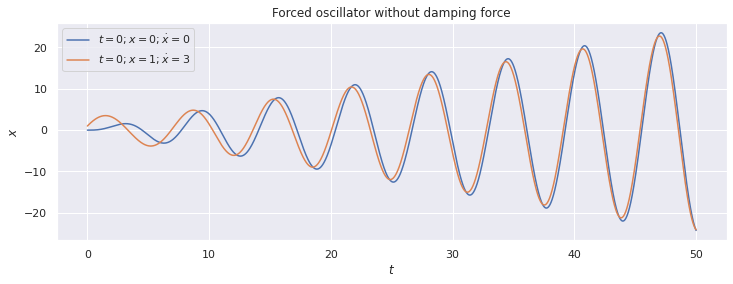

In [12]:
D11 = secondOrderEuler(0, 0, 0, lambda x, y, z: - y + np.sin(x) , 50, 0.01)
D12 = secondOrderEuler(0, 1, 3, lambda x, y, z: - y + np.sin(x) , 50, 0.01)

#Plotting
plt.title("Forced oscillator without damping force")
plt.plot(D11.x_axis(), D11.y_axis(), label = r"$t=0; x = 0; \dot x = 0$")
plt.plot(D12.x_axis(), D12.y_axis(), label = r"$t=0; x = 1; \dot x = 3$")
plt.legend(loc = 'best')
plt.xlabel(r'$t$')
plt.ylabel(r"$x$")
plt.show()

**Conclusion**:

We can see that the oscillation becomes large as time goes high. So after the *elastic limit* the spring will finally break!
***

## 3. No small angle approximation:

In the case simple pendulum we take the small angle for the SHM equation. Now I want to revisit this equation.
So the diffarential equation for simple pendulum is 
$$\ddot \theta = - \frac{g}{l}\sin \theta$$

> **Initial conditions** we can make is that at $t = 0$ the angle substanted by the pendulum is $\pi/2$ and the angular velocity at that point is zero i.e, at $t = 0$ , $\theta = \frac{\pi}{2}$ and $\frac{d \theta}{dt}=0$

Take $\frac {g}{l}= 1$

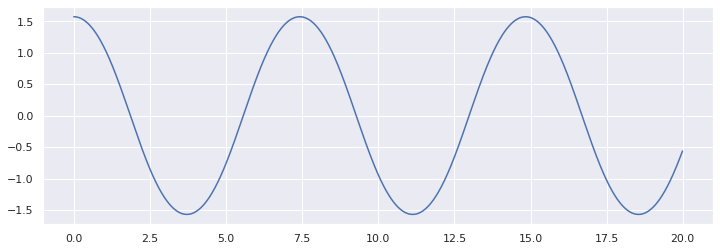

In [16]:
D13 = secondOrderEuler(0, np.pi/2, 0, lambda x, y, z: -np.sin(y), 20, 0.01)

plt.plot(D13.x_axis(), D13.y_axis())
plt.show()

I don't know what is going on here. I thought sinusoidal behavior will lost :( As the experiment-books tell us take 4°. 

****

## 4. Central Force